# Import Libraries

In [4]:
import warnings
warnings.filterwarnings("ignore")

import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

# Data Loading

In [5]:
base_dir='garbage_classification'
class_labels=os.listdir(base_dir)
class_labels.sort()
print(class_labels)

['battery', 'brown-glass', 'cardboard', 'clothes', 'green-glass', 'metal', 'plastic', 'shoes', 'white-glass']


In [6]:
for label in class_labels:
    path=os.path.join(base_dir,label)
    size=len(os.listdir(path))
    print(f'Target name: {label}, number of samples in data: {size}')

Target name: battery, number of samples in data: 946
Target name: brown-glass, number of samples in data: 608
Target name: cardboard, number of samples in data: 892
Target name: clothes, number of samples in data: 5326
Target name: green-glass, number of samples in data: 630
Target name: metal, number of samples in data: 770
Target name: plastic, number of samples in data: 872
Target name: shoes, number of samples in data: 1988
Target name: white-glass, number of samples in data: 776


In [7]:
data=[]
class_name=0
for label in class_labels:
    path=os.path.join(base_dir,label)
    print(f'images loading from the following path: {path}')
    files=os.listdir(path)
    if len(files)>1000:
        files=files[:1000]
    for sample in files:
        filepath=os.path.join(path,sample)
        try:
            image=cv2.imread(filepath)
            image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
            image=cv2.resize(image,(128,128))
            image=np.array(image)
            image=image/255.0
            data.append([image,class_name])
        except:
            continue
    class_name+=1

images loading from the following path: garbage_classification/battery
images loading from the following path: garbage_classification/brown-glass
images loading from the following path: garbage_classification/cardboard
images loading from the following path: garbage_classification/clothes
images loading from the following path: garbage_classification/green-glass
images loading from the following path: garbage_classification/metal
images loading from the following path: garbage_classification/plastic
images loading from the following path: garbage_classification/shoes
images loading from the following path: garbage_classification/white-glass


In [8]:
X,y=zip(*data)
X=np.array(X)
y=np.array(y)
print(X.shape,y.shape)

(7485, 128, 128, 3) (7485,)


In [9]:
X[0]

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       ...,

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]])

In [10]:
print(y.tolist())

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

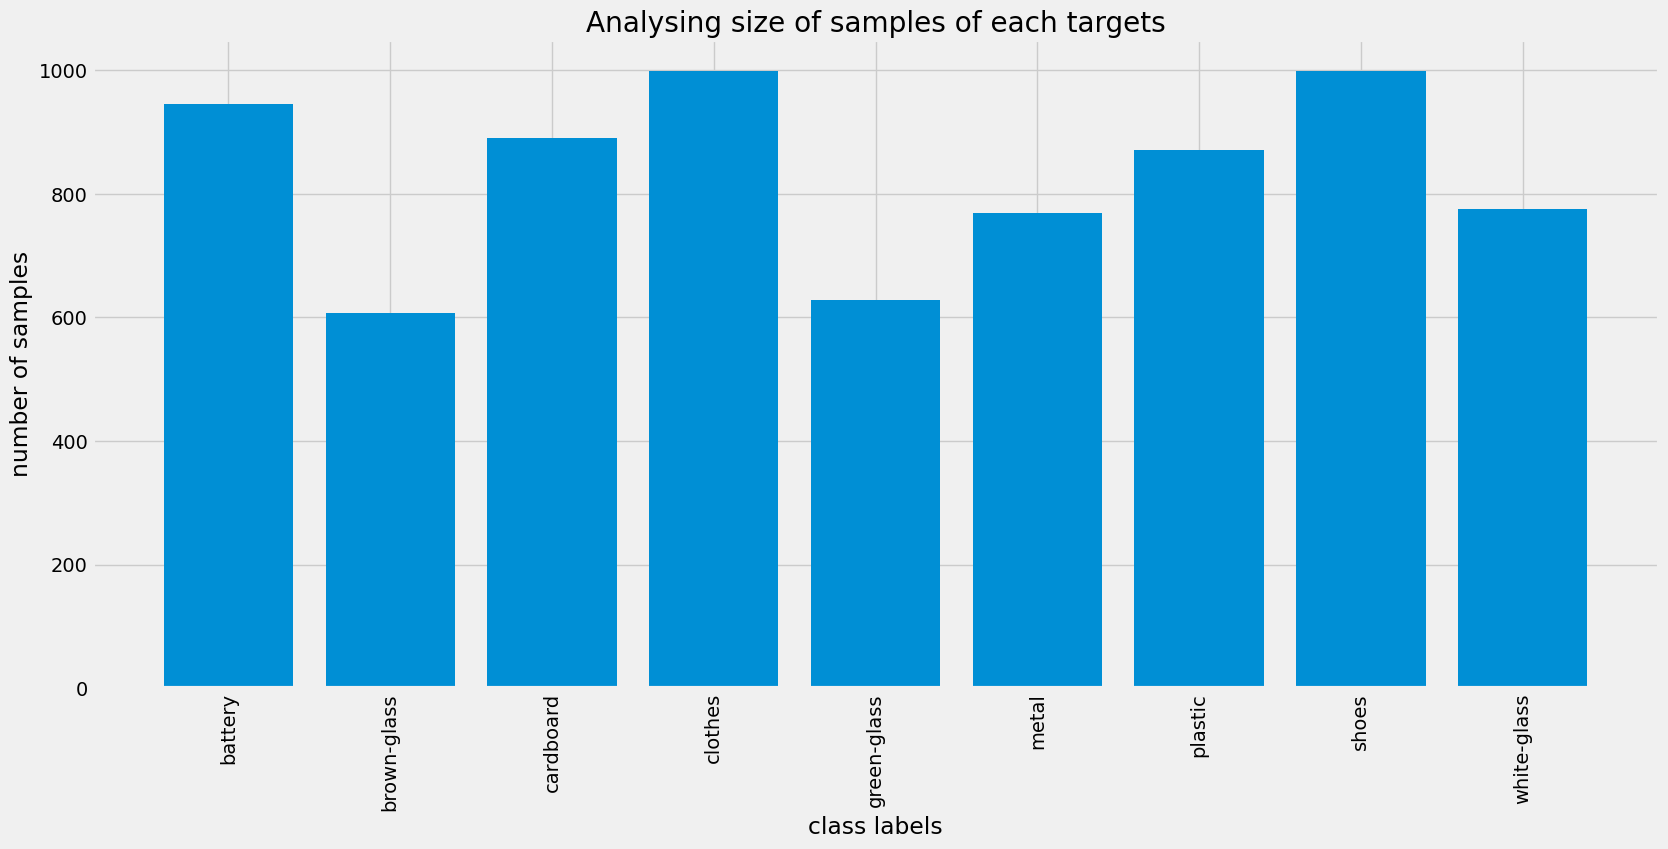

In [11]:
num_labels,size=np.unique(y,return_counts=True)
with plt.style.context(style='fivethirtyeight'):
    plt.figure(figsize=(18,8))
    plt.bar(x=class_labels,
            height=size)
    plt.title(label='Analysing size of samples of each targets')
    plt.xlabel(xlabel='class labels')
    plt.ylabel(ylabel='number of samples')
    plt.xticks(rotation=90)
    plt.show()

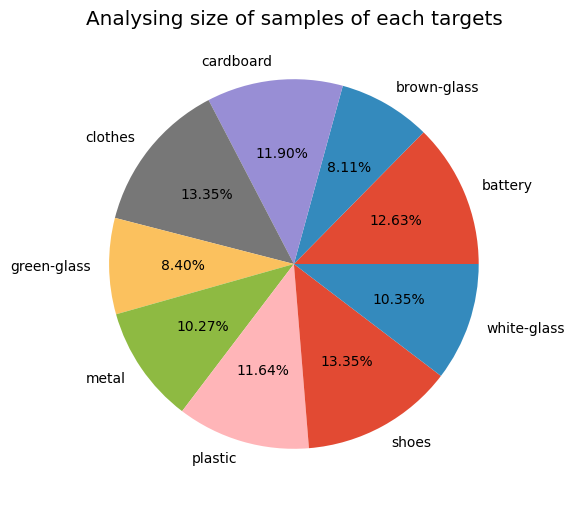

In [12]:
with plt.style.context(style='ggplot'):
    plt.figure(figsize=(6,6))
    plt.pie(labels=class_labels,
            x=size,
            autopct='%.2f%%')
    plt.title(label='Analysing size of samples of each targets')
    plt.show()

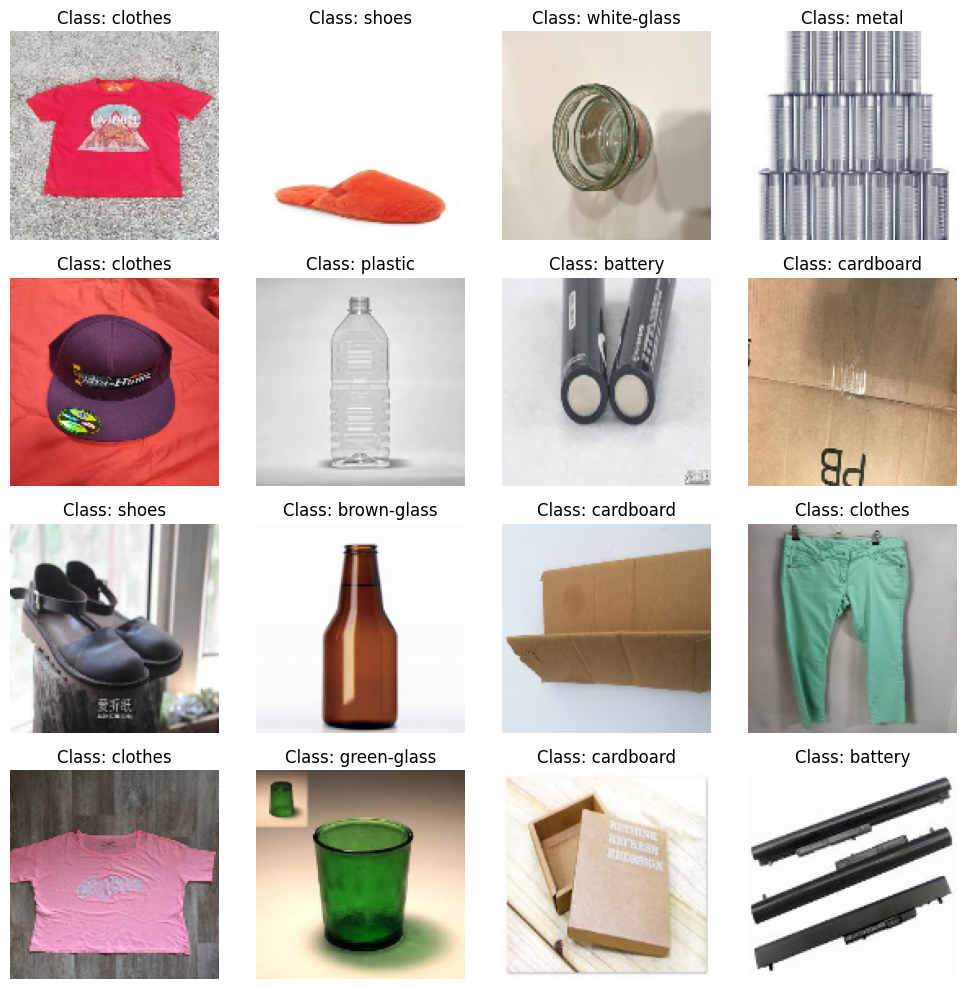

In [13]:
from random import randint

def show_images(images,labels,str_labels):
    plt.figure(figsize=(10,10))
    for i in range(16):
        ax=plt.subplot(4,4,i+1)
        idx=randint(0,len(images)-1)
        plt.imshow(images[idx])
        plt.axis('off')
        plt.title(label=f"Class: {str_labels[labels[idx]]}")
    plt.tight_layout()
    plt.show()
show_images(X,y,class_labels)

# Data Splitting

In [14]:
y=to_categorical(y)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,shuffle=True,random_state=42,stratify=y)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(5988, 128, 128, 3) (1497, 128, 128, 3) (5988, 9) (1497, 9)


# Algorithm: ConvolutionalNeuralNetwork

In [15]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Dropout,Flatten,BatchNormalization
from tensorflow.keras.optimizers import Adam

In [16]:
cnn_model=Sequential()
cnn_model.add(Conv2D(filters=64,kernel_size=3,strides=(1,1),padding="same",activation="relu",input_shape = (128,128,3)))
cnn_model.add(Conv2D(filters=64,kernel_size=3,strides=(1,1),padding="same",activation="relu"))
cnn_model.add(BatchNormalization())
cnn_model.add(MaxPool2D(pool_size=(2,2),padding="same"))

cnn_model.add(Conv2D(filters=128,kernel_size=3,strides=(1,1),padding="same",activation="relu"))
cnn_model.add(Conv2D(filters=128,kernel_size=3,strides=(1,1),padding="same",activation="relu"))
cnn_model.add(BatchNormalization())
cnn_model.add(MaxPool2D(pool_size=(2,2),padding="same"))

cnn_model.add(Conv2D(filters=256,kernel_size=3,strides=(1,1),padding="same",activation="relu"))
cnn_model.add(Conv2D(filters=256,kernel_size=3,strides=(1,1),padding="same",activation="relu"))
cnn_model.add(BatchNormalization())
cnn_model.add(MaxPool2D(pool_size=(2,2),padding="same"))

cnn_model.add(Flatten())
cnn_model.add(Dropout(rate=0.5))
cnn_model.add(Dense(units=512,activation="relu"))
cnn_model.add(Dense(units=len(class_labels),activation="softmax"))

In [17]:
cnn_model.compile(optimizer=Adam(learning_rate=0.0001),loss="categorical_crossentropy",metrics=["accuracy"])

In [18]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 64)      36928     
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 64)     256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 64, 64, 128)       1

***Model training***

In [19]:
history=cnn_model.fit(x=X_train,y=y_train,batch_size=256,epochs=20,validation_data=(X_test,y_test),shuffle=True)

Epoch 1/20
24/24 [==============================] - 68s 1s/step - loss: 2.9512 - accuracy: 0.4577 - val_loss: 3.8849 - val_accuracy: 0.1162
Epoch 2/20
24/24 [==============================] - 18s 769ms/step - loss: 0.9203 - accuracy: 0.6743 - val_loss: 5.4594 - val_accuracy: 0.1162
Epoch 3/20
24/24 [==============================] - 19s 795ms/step - loss: 0.6330 - accuracy: 0.7776 - val_loss: 6.8847 - val_accuracy: 0.1162
Epoch 4/20
24/24 [==============================] - 20s 823ms/step - loss: 0.4472 - accuracy: 0.8487 - val_loss: 7.7822 - val_accuracy: 0.1162
Epoch 5/20
24/24 [==============================] - 20s 817ms/step - loss: 0.3011 - accuracy: 0.8978 - val_loss: 8.8535 - val_accuracy: 0.1162
Epoch 6/20
24/24 [==============================] - 19s 800ms/step - loss: 0.1845 - accuracy: 0.9482 - val_loss: 9.4939 - val_accuracy: 0.1162
Epoch 7/20
24/24 [==============================] - 19s 799ms/step - loss: 0.1147 - accuracy: 0.9711 - val_loss: 9.5156 - val_accuracy: 0.1162
Ep

***Accuracy and Loss plot-graphs***

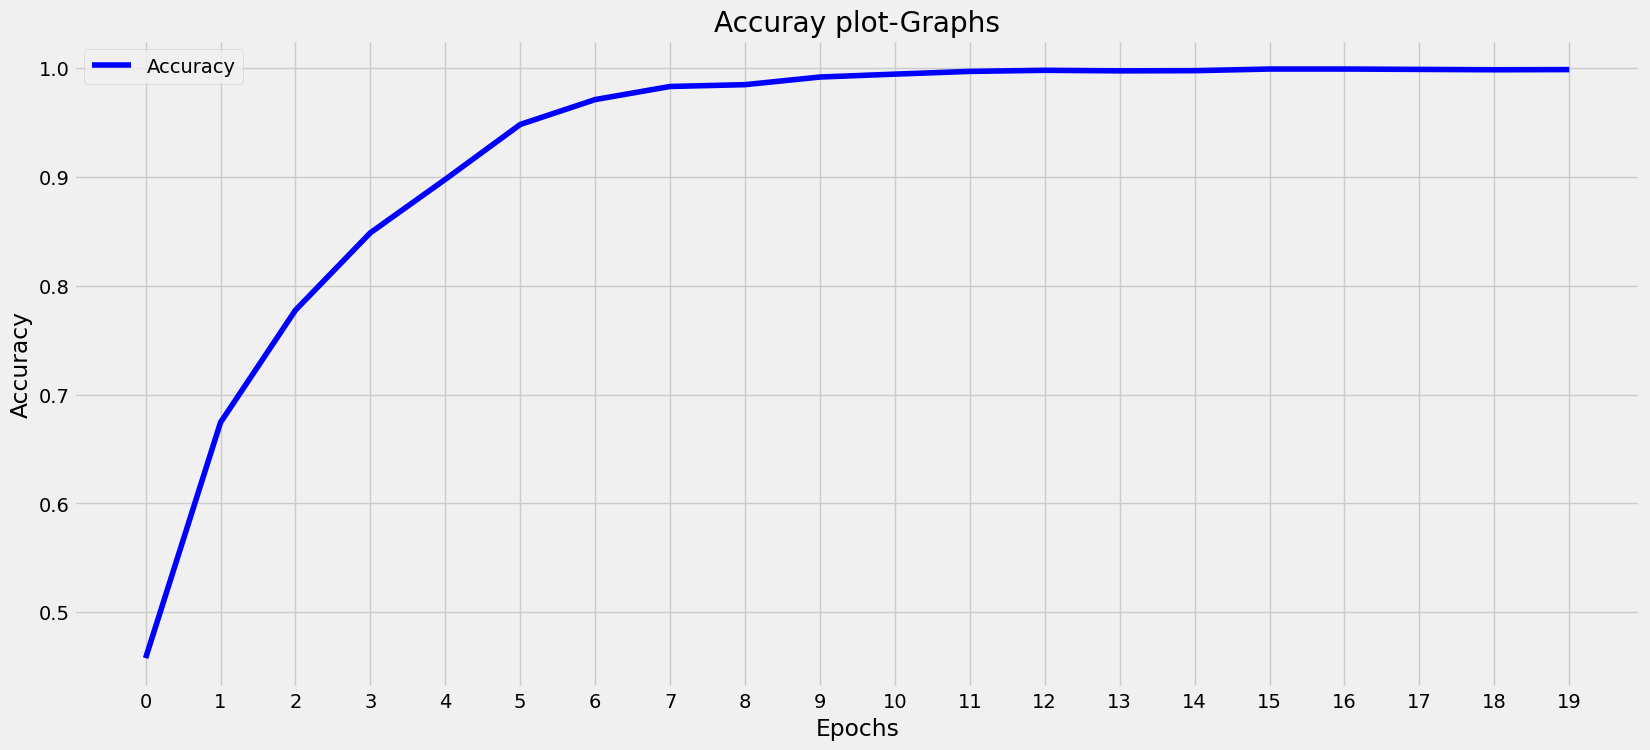

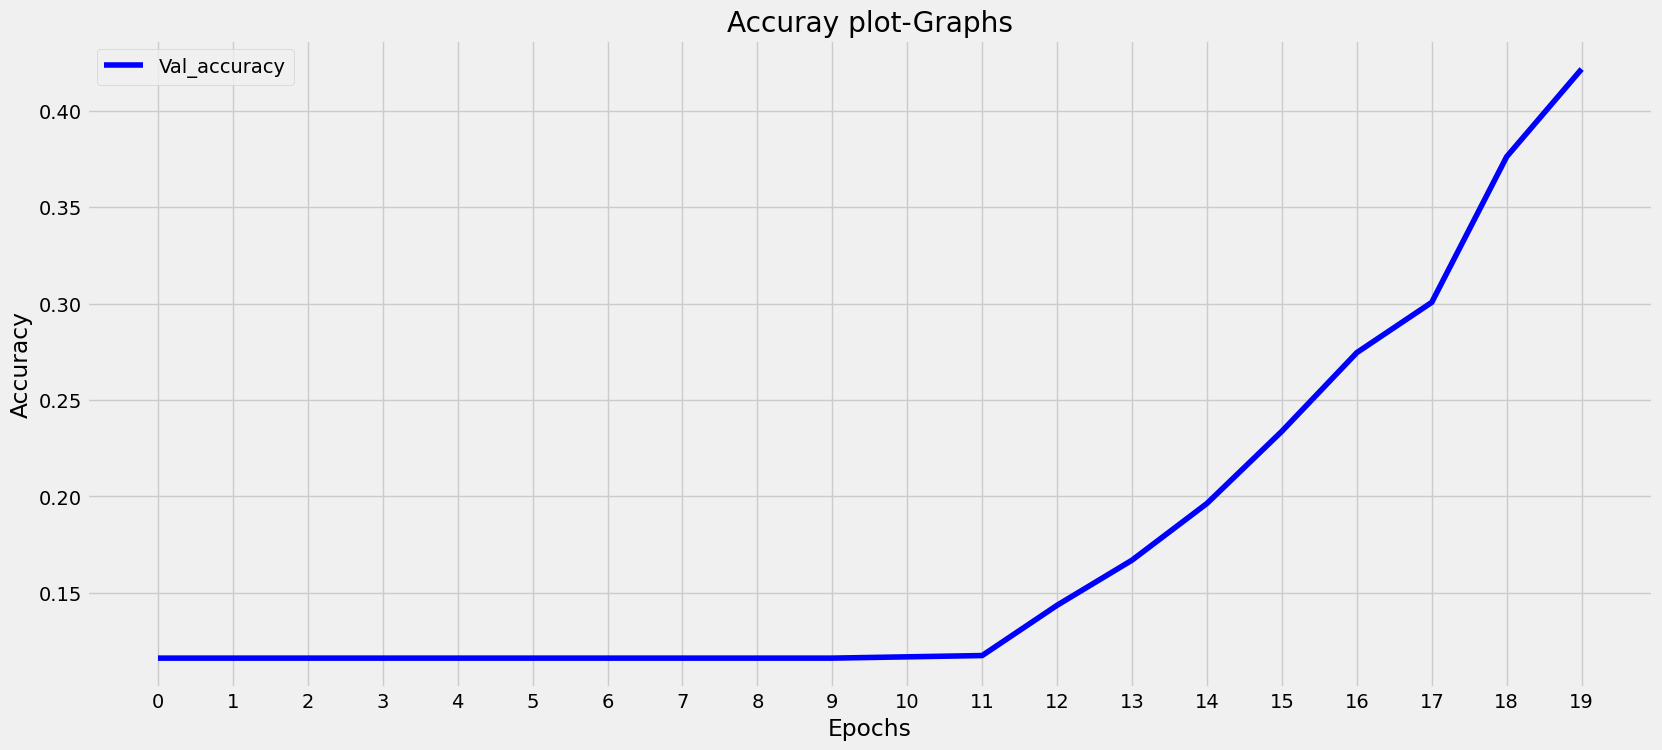

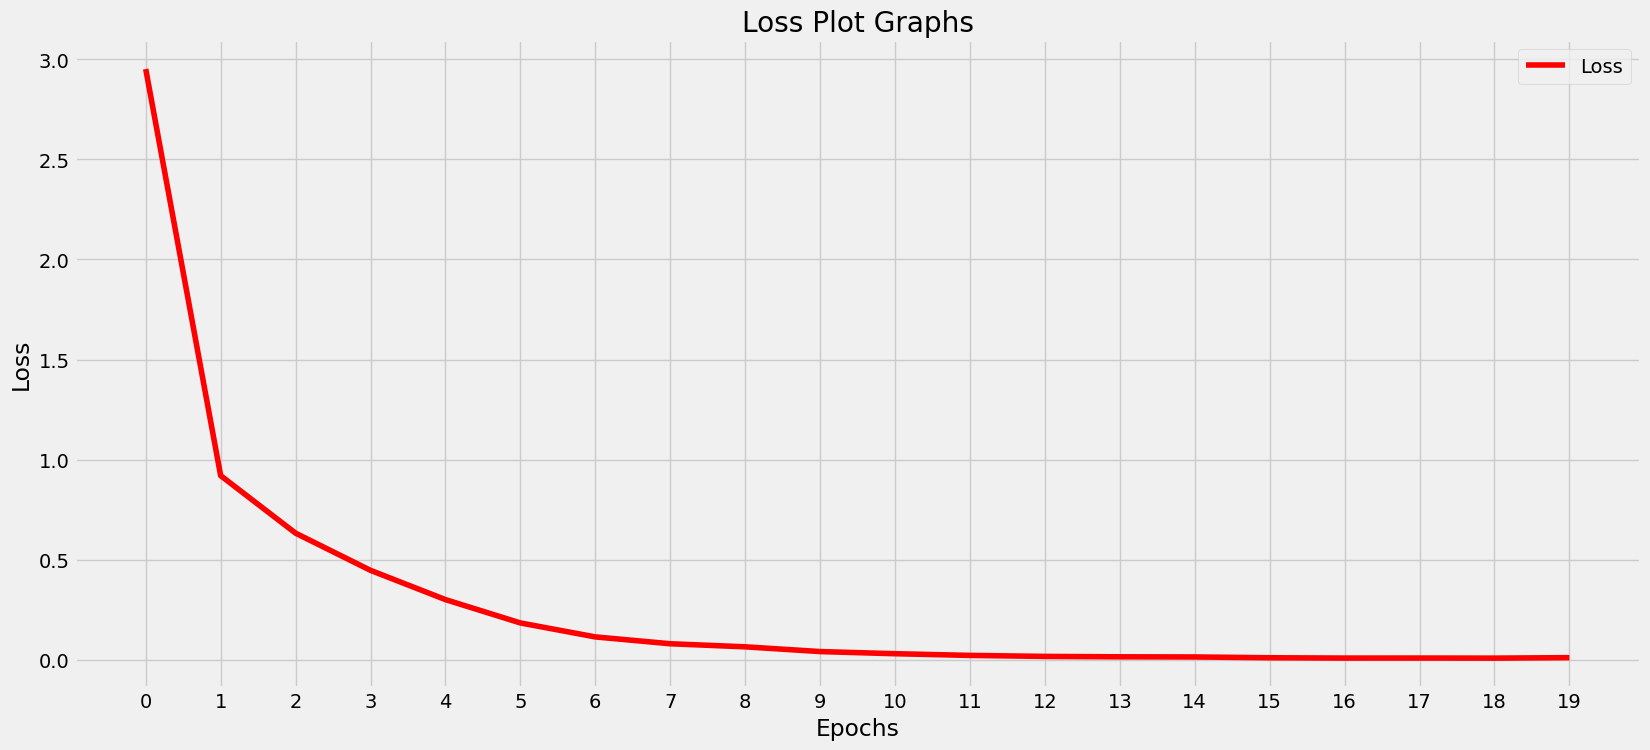

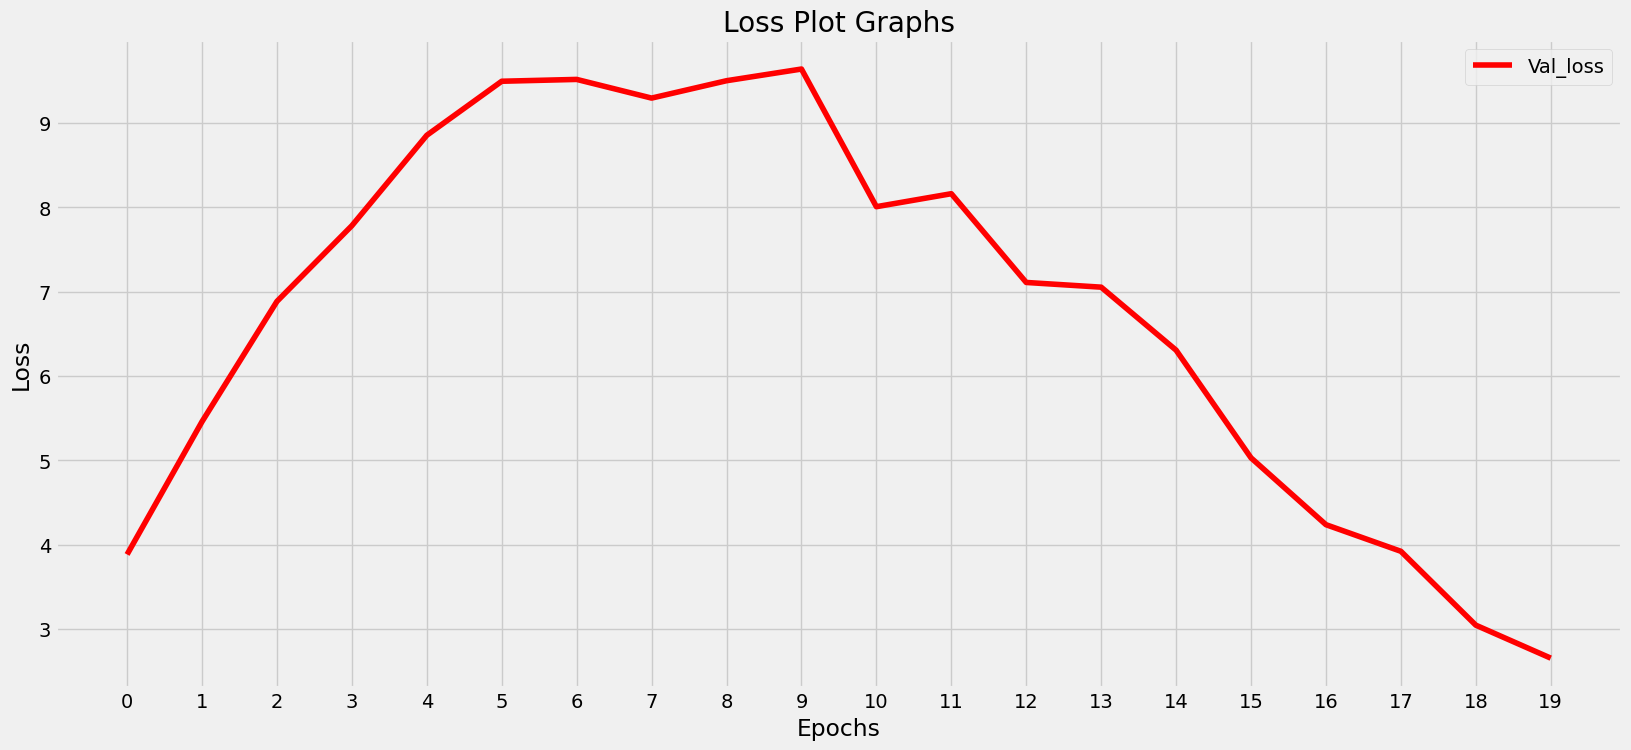

In [34]:
with plt.style.context('fivethirtyeight'):
    plt.figure(figsize=(18,8))
    plt.plot(history.history["accuracy"],color='blue')
    plt.title("Accuray plot-Graphs")
    plt.xlabel(xlabel='Epochs')
    plt.ylabel(ylabel='Accuracy')
    plt.legend(labels=["Accuracy"])
    plt.xticks(range(20))
    plt.show()

    plt.figure(figsize=(18,8))
    plt.plot(history.history["val_accuracy"], color='blue')
    plt.title("Accuray plot-Graphs")
    plt.xlabel(xlabel='Epochs')
    plt.ylabel(ylabel='Accuracy')
    plt.legend(labels=["Val_accuracy"])
    plt.xticks(range(20))
    plt.show()

    plt.figure(figsize=(18,8))
    plt.plot(history.history["loss"],color='red')
    plt.title("Loss Plot Graphs")
    plt.xlabel(xlabel='Epochs')
    plt.ylabel(ylabel='Loss')
    plt.legend(labels=["Loss"])
    plt.xticks(range(20))
    plt.show()

    plt.figure(figsize=(18,8))
    plt.plot(history.history["val_loss"], color='red')
    plt.title("Loss Plot Graphs")
    plt.xlabel(xlabel='Epochs')
    plt.ylabel(ylabel='Loss')
    plt.legend(labels=["Val_loss"])
    plt.xticks(range(20))
    plt.show()

In [21]:
y_pred = cnn_model.predict(X_test,batch_size=64,verbose=1)

24/24 [==============================] - 5s 98ms/step


In [22]:
print(y_pred)

[[2.38598545e-07 4.43262252e-05 1.41509190e-01 ... 8.56534123e-01
  1.27510415e-04 7.96283712e-04]
 [5.85596263e-06 9.20876628e-04 5.23943380e-02 ... 8.93093467e-01
  1.82373216e-04 2.26089954e-02]
 [1.26731314e-03 4.35365830e-03 1.02955006e-01 ... 4.92899656e-01
  1.90024450e-01 1.56340629e-01]
 ...
 [5.50339464e-04 1.15857006e-06 9.28229478e-04 ... 5.91386676e-01
  2.14291081e-01 1.56431824e-01]
 [8.06550361e-07 7.93057668e-04 2.29777754e-04 ... 9.34467256e-01
  1.37254596e-02 8.20904691e-03]
 [1.44355744e-02 7.08053194e-05 8.66348040e-04 ... 5.44434227e-03
  8.33590746e-01 1.80071890e-02]]


In [23]:
pred = np.argmax(y_pred,axis=1)
actual = np.argmax(y_test,axis=1)

In [24]:
print(pred.tolist())

[6, 6, 6, 4, 4, 6, 6, 5, 6, 6, 6, 6, 5, 2, 4, 6, 3, 3, 6, 8, 6, 6, 6, 7, 8, 4, 6, 2, 6, 3, 6, 4, 4, 6, 6, 2, 5, 2, 3, 6, 6, 6, 6, 8, 2, 7, 4, 7, 2, 8, 6, 6, 3, 6, 6, 6, 8, 4, 4, 6, 6, 0, 6, 6, 6, 5, 6, 5, 6, 8, 6, 3, 6, 6, 5, 2, 6, 4, 6, 4, 2, 1, 6, 6, 1, 2, 3, 2, 6, 8, 6, 8, 2, 3, 2, 4, 3, 6, 8, 3, 6, 7, 6, 6, 6, 5, 6, 8, 6, 2, 6, 6, 6, 6, 8, 4, 2, 3, 6, 5, 4, 4, 5, 6, 6, 6, 6, 6, 3, 6, 3, 3, 6, 4, 8, 8, 7, 3, 6, 6, 6, 3, 4, 2, 4, 4, 6, 6, 6, 6, 4, 6, 8, 6, 7, 6, 2, 7, 4, 2, 5, 6, 6, 7, 6, 4, 6, 4, 6, 6, 5, 2, 0, 6, 6, 2, 6, 6, 4, 5, 6, 6, 4, 7, 2, 6, 6, 5, 4, 6, 0, 6, 6, 6, 6, 4, 5, 8, 6, 6, 6, 6, 8, 3, 6, 6, 3, 6, 6, 6, 1, 6, 5, 6, 6, 6, 3, 2, 6, 3, 7, 3, 6, 8, 3, 8, 6, 4, 6, 6, 6, 6, 6, 6, 6, 8, 5, 4, 6, 4, 8, 6, 6, 6, 6, 4, 1, 6, 3, 4, 6, 3, 8, 6, 0, 6, 3, 5, 8, 8, 6, 6, 6, 6, 4, 6, 4, 8, 3, 6, 0, 4, 3, 3, 6, 8, 6, 5, 6, 6, 8, 8, 6, 6, 6, 5, 6, 6, 4, 8, 1, 2, 8, 6, 7, 0, 5, 4, 4, 8, 4, 5, 6, 8, 3, 4, 2, 4, 6, 6, 0, 8, 4, 3, 6, 4, 6, 5, 8, 6, 6, 2, 6, 4, 0, 4, 8, 6, 6, 3, 6, 6, 6, 

In [25]:
print(actual.tolist())

[2, 5, 0, 1, 4, 7, 7, 0, 1, 5, 3, 8, 0, 2, 4, 0, 3, 1, 6, 8, 5, 6, 7, 7, 8, 4, 6, 2, 0, 0, 3, 4, 1, 2, 7, 2, 0, 2, 3, 8, 8, 1, 8, 0, 2, 7, 4, 5, 2, 7, 6, 6, 3, 8, 7, 7, 0, 4, 6, 3, 5, 0, 0, 8, 6, 7, 0, 5, 0, 0, 2, 3, 5, 3, 1, 2, 8, 3, 5, 4, 2, 1, 8, 8, 1, 2, 3, 2, 6, 3, 8, 7, 2, 0, 2, 4, 3, 8, 8, 3, 6, 7, 7, 3, 5, 6, 6, 8, 6, 2, 5, 6, 6, 5, 6, 4, 3, 3, 7, 0, 4, 4, 0, 6, 6, 8, 0, 6, 3, 7, 1, 7, 1, 1, 6, 8, 7, 3, 3, 0, 5, 3, 1, 2, 0, 1, 1, 4, 8, 7, 4, 6, 2, 6, 0, 6, 7, 1, 4, 1, 0, 1, 0, 7, 6, 3, 2, 6, 5, 0, 0, 2, 0, 6, 5, 2, 2, 6, 1, 0, 8, 8, 7, 7, 2, 6, 5, 0, 4, 7, 0, 6, 0, 5, 5, 4, 0, 1, 6, 8, 0, 7, 5, 3, 3, 1, 3, 1, 5, 8, 1, 8, 0, 0, 6, 6, 7, 2, 0, 3, 7, 7, 7, 8, 3, 8, 1, 4, 5, 5, 5, 7, 5, 4, 8, 8, 5, 4, 0, 5, 0, 5, 6, 7, 5, 4, 1, 5, 3, 4, 0, 3, 5, 7, 0, 5, 3, 0, 8, 2, 7, 6, 6, 5, 3, 7, 1, 3, 3, 5, 0, 4, 3, 3, 8, 1, 8, 0, 1, 8, 3, 3, 1, 5, 5, 3, 2, 6, 4, 3, 1, 2, 4, 2, 3, 0, 0, 4, 0, 4, 4, 0, 7, 7, 3, 4, 2, 4, 2, 6, 0, 6, 4, 3, 3, 7, 8, 0, 1, 0, 8, 2, 6, 4, 0, 4, 8, 5, 2, 3, 5, 5, 6, 

### Result Analysis

***Accuracy Score***

In [26]:
cnn_accuracy=accuracy_score(y_true=actual,y_pred=pred)
print(f"Validation accuracy of ConvolutionalLongShort-TermMemory model is {cnn_accuracy*100.0:.2f}%")

Validation accuracy of ConvolutionalLongShort-TermMemory model is 42.15%


***Classification Report***

In [27]:
print(classification_report(y_true=actual,y_pred=pred,target_names=class_labels))

              precision    recall  f1-score   support

     battery       1.00      0.14      0.25       189
 brown-glass       0.93      0.21      0.34       121
   cardboard       0.77      0.62      0.69       178
     clothes       0.73      0.64      0.68       200
 green-glass       0.61      0.85      0.71       126
       metal       0.15      0.08      0.11       154
     plastic       0.22      0.87      0.36       174
       shoes       0.61      0.14      0.22       200
 white-glass       0.29      0.28      0.29       155

    accuracy                           0.42      1497
   macro avg       0.59      0.42      0.40      1497
weighted avg       0.60      0.42      0.40      1497



***Confusion Matrix***

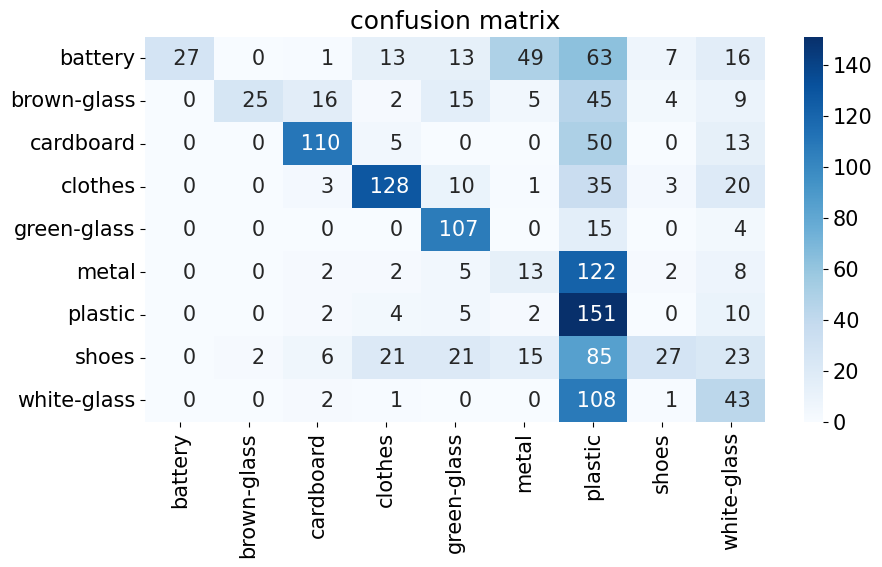

In [28]:
plt.figure(figsize=(10,5))
plt.rcParams['font.size']=15
ax=sns.heatmap(data=confusion_matrix(y_true=actual,y_pred=pred),
               annot=True,
               fmt='4d',
               xticklabels=class_labels,
               yticklabels=class_labels,
               cmap=plt.cm.Blues)
plt.title(label='confusion matrix')
plt.show()

***model saving***

In [29]:
cnn_model.save("models/ConvolutionalNeuralNetwork_model.h5")

---